<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/solutions/SOLN_L3_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations, Lab 3: Practice with Feature Engineering and Pipelines

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

In this lab we will continue to practice creation of pipelines and feature engineering. We will use the wine dataset.

<br>

---




In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

wine = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

## On Wine Density

### L1 Q1: Feature Derivation

1. Fill in any missing data in your dataset using imputation and use this new data for Q2-Q3
2. One-Hot encode categorical variables in the wine dataset

In [62]:
# Code Cell for L1 Q1
display(wine.head())
print(wine.shape)
str_cols = ['type']

enc = OneHotEncoder()
imp = SimpleImputer()

enc.fit_transform(wine[str_cols])
X_cat = enc.transform(wine[str_cols]).toarray()

X = wine.copy()
X.pop('type')
y = X.pop('density')
X = imp.fit_transform(X)

X = np.hstack([X_cat, X])
print(y.shape)
print(X.shape)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(6497, 13)
(6497,)
(6497, 13)


### L1 Q2: Feature Transformation

Use `StandardScaler` on the input data and evaluate how this affects VIF, kurtosis, and skew

You should ignore the one-hot encoded column(s) for this section

In [63]:
# Non-one hot encoded columns
cols = list(wine.columns)
cols.remove('density')
cols.remove('type')

In [64]:
# Code Cell for L1 Q2
kurt1 = pd.DataFrame(X[:,2:], columns=cols).kurt()
skew1 = pd.DataFrame(X[:,2:], columns=cols).skew()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[:,2:], i) for i in 
                     range(X[:,2:].shape[1])]
vif.index = cols
vif["kurtosis"] = kurt1
vif["skew"] = skew1
vif

,VIF Factor,kurtosis,skew
fixed acidity,41.790949,5.070143,1.724131
volatile acidity,9.482732,2.834263,1.496433
citric acid,9.344218,2.404077,0.473142
residual sugar,3.336944,4.360399,1.435221
chlorides,5.398369,50.911457,5.400680
free sulfur dioxide,8.529778,7.906238,1.220066
total sulfur dioxide,13.448130,-0.371664,-0.001177
pH,149.003349,0.374743,0.387234
sulphates,18.402953,8.667071,1.799021
alcohol,114.836088,-0.531687,0.565718


In [65]:
scaler = StandardScaler()
X[:,2:] = scaler.fit_transform(X[:,2:])

kurt1 = pd.DataFrame(X[:,2:], columns=cols).kurt()
skew1 = pd.DataFrame(X[:,2:], columns=cols).skew()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[:,2:], i) for i in 
                     range(X[:,2:].shape[1])]
vif.index = cols
vif["kurtosis"] = kurt1
vif["skew"] = skew1
vif

,VIF Factor,kurtosis,skew
fixed acidity,1.781336,5.070143,1.724131
volatile acidity,1.808525,2.834263,1.496433
citric acid,1.606484,2.404077,0.473142
residual sugar,1.533403,4.360399,1.435221
chlorides,1.564413,50.911457,5.400680
free sulfur dioxide,2.156598,7.906238,1.220066
total sulfur dioxide,2.872586,-0.371664,-0.001177
pH,1.413100,0.374743,0.387234
sulphates,1.364157,8.667071,1.799021
alcohol,1.696986,-0.531687,0.565718


### L1 Q3: Modeling

Create a Pipeline using one of the scaling methods in sklearn and linear or logistic regression 

If you are using logistic regression:

* **_dependent variable:_** wine quality

If you are using linear regression:

* **_dependent variable:_** wine density



In [67]:
# Code Cell for L1 Q3
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Test, R2: 0.963')

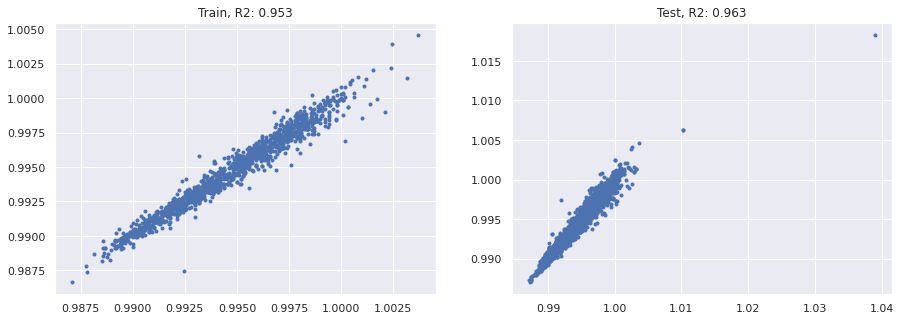

In [70]:
fig, (ax, ax_) = plt.subplots(1,2,figsize=(15,5))
ax.plot(y_test, model.predict(X_test), ls='', marker='.')
ax_.plot(y_train, model.predict(X_train), ls='', marker='.')
ax.set_title("Train, R2: {:.3f}".format(r2_score(y_train, model.predict(X_train))))
ax_.set_title("Test, R2: {:.3f}".format(r2_score(y_test, model.predict(X_test))))

## On Wine Quality

### L1 Q1: Feature Derivation

1. Fill in any missing data in your dataset using imputation and use this new data for Q2-Q3
2. One-Hot encode categorical variables in the wine dataset

In [71]:
# Code Cell for L1 Q1
display(wine.head())
print(wine.shape)
str_cols = ['type']

enc = OneHotEncoder()
imp = SimpleImputer()

enc.fit_transform(wine[str_cols])
X_cat = enc.transform(wine[str_cols]).toarray()

X = wine.copy()
X.pop('type')
y = X.pop('quality')
X = imp.fit_transform(X)

X = np.hstack([X_cat, X])
print(y.shape)
print(X.shape)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(6497, 13)
(6497,)
(6497, 13)


### L1 Q2: Feature Transformation

Use `StandardScaler` on the input data and evaluate how this affects VIF, kurtosis, and skew

You should ignore the one-hot encoded column(s) for this section

In [72]:
scaler = StandardScaler()
X[:,2:] = scaler.fit_transform(X[:,2:])

### L1 Q3: Modeling

Create a Pipeline using one of the scaling methods in sklearn and linear or logistic regression 

If you are using logistic regression:

* **_dependent variable:_** wine quality

If you are using linear regression:

* **_dependent variable:_** wine density



In [74]:
# Code Cell for L1 Q3
model = LogisticRegression(max_iter=1e4)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.60      0.07      0.12        46
           5       0.58      0.61      0.59       420
           6       0.52      0.68      0.59       579
           7       0.44      0.19      0.26       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.36      0.26      0.26      1300
weighted avg       0.51      0.54      0.50      1300



<AxesSubplot:>

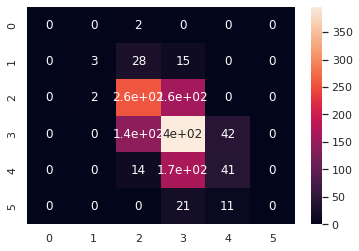

In [81]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)